In [ ]:
## Technically these files should be uploaded to the server during the time of deployment, Since we don't have a server/ nor we are deploying it, it will be stored locally. But one will need gdrive credentials.
!unzip /content/drive/MyDrive/FYP_FINAL/FINAL/full_cnn_trained_model.zip
!unzip /content/drive/MyDrive/FYP_FINAL/HMA/hma_cnn_trained_model.zip
!unzip /content/drive/MyDrive/FYP_FINAL/IBF/ibf_cnn_trained_model.zip
!unzip /content/drive/MyDrive/FYP_FINAL/OHBF/ohbf_cnn_trained_model.zip
!unzip /content/drive/MyDrive/FYP_FINAL/UHBF/cnn_trained_model.zip
!unzip /content/drive/MyDrive/FYP_FINAL/VMA/cnn_trained_model.zip


Archive:  /content/drive/MyDrive/FYP_FINAL/FINAL/full_cnn_trained_model.zip
   creating: content/trained_model/
   creating: content/trained_model/full_final_base_CNN.hd5/
  inflating: content/trained_model/full_final_base_CNN.hd5/saved_model.pb  
   creating: content/trained_model/full_final_base_CNN.hd5/variables/
  inflating: content/trained_model/full_final_base_CNN.hd5/variables/variables.index  
  inflating: content/trained_model/full_final_base_CNN.hd5/variables/variables.data-00000-of-00001  
   creating: content/trained_model/full_final_base_CNN.hd5/assets/
  inflating: content/trained_model/full_final_base_CNN.hd5/keras_metadata.pb  
Archive:  /content/drive/MyDrive/FYP_FINAL/HMA/hma_cnn_trained_model.zip
   creating: content/trained_model/hma_base_CNN.hd5/
  inflating: content/trained_model/hma_base_CNN.hd5/keras_metadata.pb  
   creating: content/trained_model/hma_base_CNN.hd5/variables/
  inflating: content/trained_model/hma_base_CNN.hd5/variables/variables.data-00000-of-0

In [ ]:
!unzip /content/drive/MyDrive/FinalYearProject/horizontal-misalignment.zip

Importing Libraries...
Libraries imported
Loading Models ..
Models Loaded.
Input 'yes' to see the signals yes
Processing the signal
Signal processed
Computing results..



Given signal indicates that the motor has HMA of 1.5mm


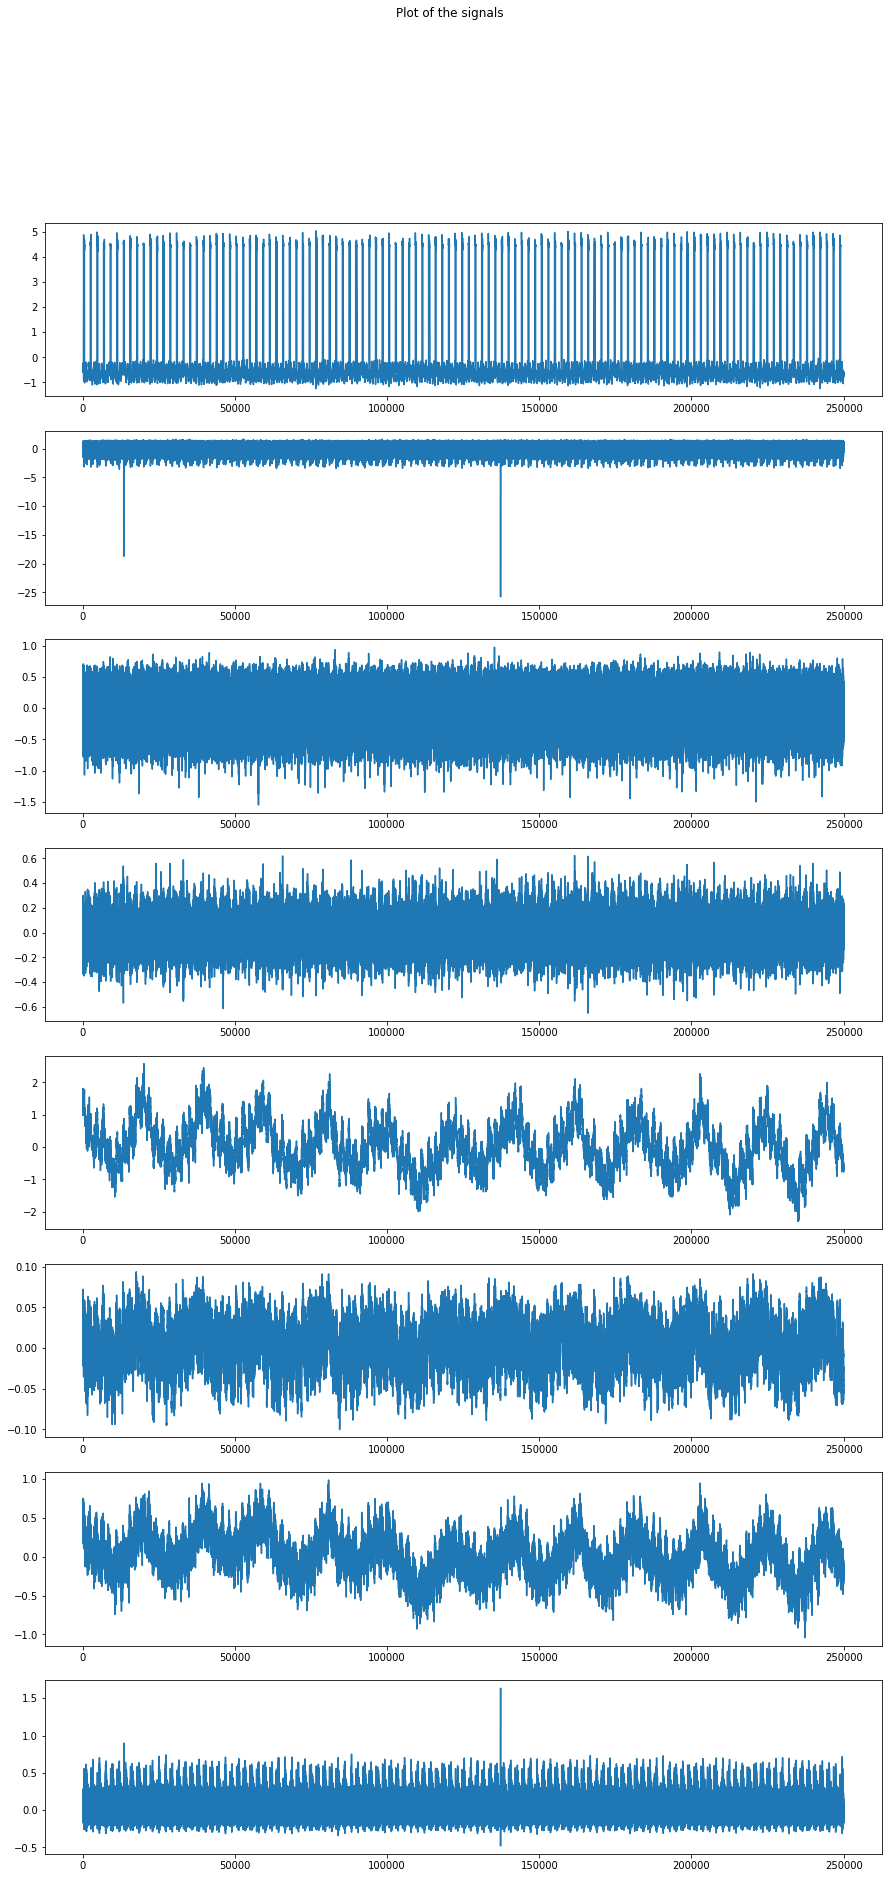

In [ ]:
print("Importing Libraries...")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from scipy import signal
import scipy

print("Libraries imported")


print("Loading Models ..")

model_full = tf.keras.models.load_model("/content/content/trained_model/full_final_base_CNN.hd5")
model_hma = tf.keras.models.load_model("/content/content/trained_model/hma_base_CNN.hd5")
model_ibf = tf.keras.models.load_model("/content/content/trained_model/ibf_base_CNN.hd5")
model_ohbf = tf.keras.models.load_model("/content/content/trained_model/ohbf_base_CNN.hd5")
model_uhbf = tf.keras.models.load_model("/content/content/trained_model/uhbf_base_CNN.hd5")
model_vma = tf.keras.models.load_model("/content/content/trained_model/vma_base_CNN.hd5")

COLUMNS=["Tachometer signal","ax_UBA","r_UBA","tan_UBA","ax_OBA","r_OBA","tan_OBA","mic"]
COLS_FULL = ["Normal","HMA","IBF","OHBF","UHBF","VMA"]
COLS_HMA = ["healthy","0.5mm","1mm","1.5mm","2mm"]
COLS_IBF = ["healthy","6g","10g","15g","20g","25g","30g","35g"]
COLS_OHBF = ["healthy","ohbf0","ohbf6","ohbf20","ohbf35","ohcf0","ohcf6","ohcf20","ohcf35","ohor0","ohor6","ohor20","ohor35"]
COLS_UHBF = ["healthy","uhbf0","uhbf6","uhbf20","uhbf35","uhcf0","uhcf6","uhcf20","uhcf35","uhor0","uhor6","uhor20","uhor35"]
COLS_VMA = ["healthy","0.51mm","0.63mm","1.27mm","1.40mm","1.78mm","1.90mm"]


MODELS = [model_full, model_hma, model_ibf, model_ohbf, model_uhbf, model_vma]

print("Models Loaded.")

def plot_data(data,cols):
  a = input("Input 'yes' to see the signals ")
  if a == 'yes':
    fig, axs = plt.subplots(8, sharex = False, sharey = False, figsize = (15,30))
    fig.suptitle("Plot of the signals")
    for i in range(len(cols)):
      axs[i].plot(data[cols[i]])


def processing(data):
    print("Processing the signal")
    num_samples = 5000
    data = INPUT
    resampled_data = pd.DataFrame()
    for i in range(8):
      _ = pd.DataFrame(signal.resample(data.iloc[:,i],num_samples))
      resampled_data = pd.concat([resampled_data,_],axis =1,ignore_index = True)

    resampled_data.columns = COLUMNS
    
    x = resampled_data.to_numpy().reshape(-1,num_samples,8)
    time_frame = 1000
    time_interval = 200

    X_data = np.array(np.ones((1,8)))

    for i in x:
        for j in range(time_frame//2,len(i)-time_frame//2,time_interval):
            X_data = np.vstack([X_data,i[j-time_frame//2:j+time_frame//2]])

    print("Signal processed")

    return X_data[1:,:].reshape(-1,time_frame,8)

def prediction(init_prediction,processed_data):
  if init_prediction == 'HMA':
    fin_prediction = COLS_HMA[scipy.stats.mode(np.argmax(model_hma.predict(processed_data),axis = 1))[0][0]]
    print(f"Given signal indicates that the motor has {init_prediction} of {fin_prediction}")

  elif init_prediction == "IBF":
    fin_prediction = COLS_IBF[scipy.stats.mode(np.argmax(model_ibf.predict(processed_data),axis = 1))[0][0]]
    print(f"Given signal indicates that the motor has {init_prediction} of {fin_prediction}")

  elif init_prediction == "OHBF":
    fin_prediction = COLS_OHBF[scipy.stats.mode(np.argmax(model_ohbf.predict(processed_data),axis = 1))[0][0]]
    print(f"Given signal indicates that the motor has {init_prediction} of {fin_prediction}")

  elif init_prediction == "UHBF":
    fin_prediction = COLS_UHBF[scipy.stats.mode(np.argmax(model_uhbf.predict(processed_data),axis = 1))[0][0]]
    print(f"Given signal indicates that the motor has {init_prediction} of {fin_prediction}")
    
  elif init_prediction == "VMA":
    fin_prediction = COLS_VMA[scipy.stats.mode(np.argmax(model_vma.predict(processed_data),axis = 1))[0][0]]
    print(f"Given signal indicates that the motor has {init_prediction} of {fin_prediction}")

  elif init_prediction == "Normal":
    print("Given signal indicated that the motor is Normal")


if __name__ == "__main__":
  INPUT = pd.read_csv('/content/horizontal-misalignment/1.5mm/23.552.csv',header = None) #horizontal-misalignment/1.5mm/23.552.csv
  INPUT.columns = COLUMNS
  plot_data(INPUT,COLUMNS)
  processed_data = processing(INPUT)
  print("Computing results..")
  init_prediction = COLS_FULL[scipy.stats.mode(np.argmax(model_full.predict(processed_data),axis = 1))[0][0]]
  print("\n"*2)
  prediction(init_prediction, processed_data)




In [ ]:
INPUT = pd.read_csv('/content/horizontal-misalignment/1.5mm/23.552.csv',header = None) #horizontal-misalignment/1.5mm/23.552.csv
INPUT

,0,1,2,3,4,5,6,7
0,-0.59265,0.84783,0.154800,0.076980,1.71730,0.002688,0.50877,0.112520
1,-0.57832,-1.22930,0.004050,-0.058684,1.68270,0.002502,0.44327,-0.041641
2,-0.59630,1.01680,0.332560,-0.046705,1.77630,0.004061,0.49998,-0.010926
3,-0.58043,-1.07510,-0.346090,-0.059114,1.70660,0.005621,0.40021,0.105310
4,-0.58972,0.90594,0.336710,0.040190,1.79210,0.007110,0.46805,-0.128940
...,...,...,...,...,...,...,...,...
249995,-0.55887,0.96116,0.406700,0.140570,-0.67930,-0.026030,-0.17966,-0.114700
249996,-0.66273,-0.11345,-0.310120,0.054320,-0.75153,-0.027853,-0.26606,0.098643
249997,-0.62740,0.35522,0.417940,0.059131,-0.68358,-0.027782,-0.24053,-0.154670
249998,-0.59470,0.59433,-0.026317,-0.045536,-0.69375,-0.027179,-0.27495,0.087423
